### ЛАБОРАТОРНА РОБОТА № 4 Варіант 10
### Оцінювання параметрів різницевого рівняння авторегресії із ковзним середнім на основі експериментальних даних за допомогою МНК і РМНК
#### Завдання виконала команда № 10

In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

Завантажуємо данні з файлів: Revolns.txt, NONREVNS.txt

In [654]:
rev=np.loadtxt(r"Revolns.txt ")
nonrev=np.loadtxt(r"NONREVNS.txt")

rev_breaker = 480
nonrev_breaker = 780

rev_y_test=rev[rev_breaker:]
rev_train=rev[:rev_breaker]
rev_x_test=np.arange(len(rev_train)+1, len(rev_train)+len(rev_test)+1)
nonrev_y_test=nonrev[nonrev_breaker:]
nonrev_train=nonrev[:nonrev_breaker]
nonrev_x_test=np.arange(len(nonrev_train)+1, len(nonrev_train)+len(nonrev_test)+1)


Зображаємо данні

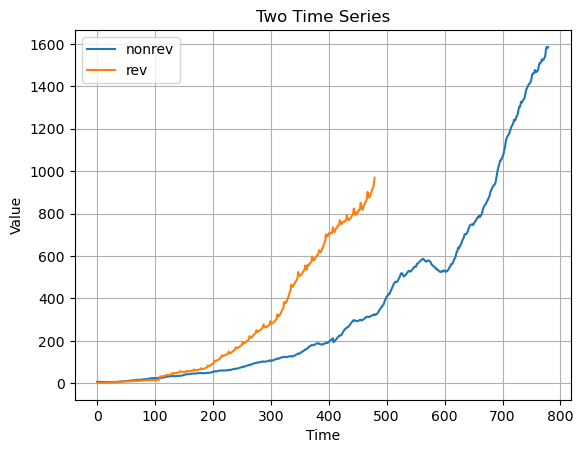

In [655]:
plt.plot(nonrev_train, label='nonrev')
plt.plot(rev_train, label='rev')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Two Time Series')
plt.legend()
plt.grid(True)
plt.show()

### Спробуємо лінійний тренд для rev

In [656]:
rev_x_axis_values=np.arange(1, len(rev_train)+1)

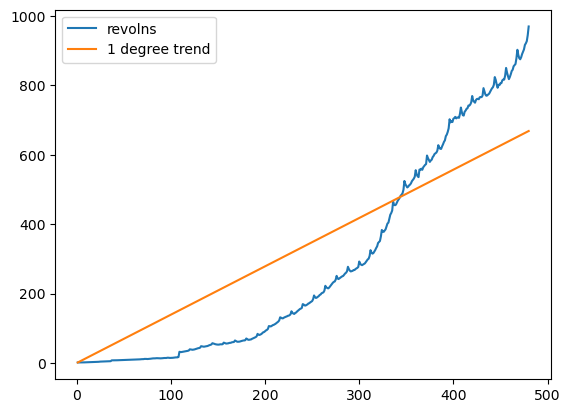

In [657]:
one_degree_model_rev = sm.OLS(rev_train, rev_x_axis_values).fit()
predict_on_one_degree_rev = one_degree_model_rev.predict(rev_x_axis_values) 

plt.plot(rev_x_axis_values,rev_train, label='revolns')
plt.plot(rev_x_axis_values,predict_on_one_degree_rev, label='1 degree trend')
plt.legend()

Отримали модель:

In [658]:
coefficients1_1 = one_degree_model_rev.params
print('y(k)=',coefficients1_1[0], '* k')

y(k)= 1.392301388777716 * k


Спробуємо лінійний тренд для nonrev

In [659]:
nonrev_x_axis_values=np.arange(1, len(nonrev_train)+1)

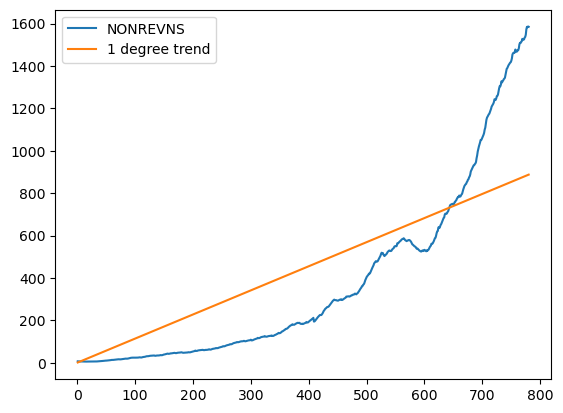

In [660]:
one_degree_model_nonrev = sm.OLS(nonrev_train, nonrev_x_axis_values).fit()
predict_on_one_degree_nonrev = one_degree_model_nonrev.predict(nonrev_x_axis_values) 

plt.plot(nonrev_x_axis_values,nonrev_train, label='NONREVNS')
plt.plot(nonrev_x_axis_values,predict_on_one_degree_nonrev, label='1 degree trend')
plt.legend()

Отримали модель:

In [661]:
coefficients1_2 = one_degree_model_nonrev.params
print('y(k)=',coefficients1_2[0], '* k')

y(k)= 1.1374753611196484 * k


### Спробуємо тренд 2-го порядку:

In [662]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(rev_x_axis_values[:, np.newaxis])

two_degree_model_rev = sm.OLS(rev_train, X_poly).fit()
predict_on_two_degree_rev = two_degree_model_rev.predict(X_poly)

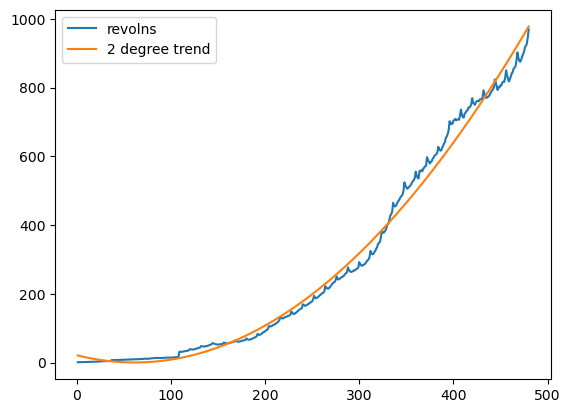

In [663]:
plt.plot(rev_x_axis_values,rev_train, label='revolns')
plt.plot(rev_x_axis_values,predict_on_two_degree_rev, label='2 degree trend')
plt.legend()

Отримали модель:

In [664]:
coefficients2_1 = two_degree_model_rev.params
print('y(k)=',coefficients2_1[0],'+',coefficients2_1[1], '* k +',coefficients2_1[2], '* k^2')

y(k)= 21.53205628007914 + -0.6836592117036349 * k + 0.005574041257283386 * k^2


За графіком можна помітити, що покищо найкращим трендом є тренд 2-го порядку

Спробуємо тренд 2-го порядку для nonrev

In [665]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(nonrev_x_axis_values[:, np.newaxis])

two_degree_model_nonrev = sm.OLS(nonrev_train, X_poly).fit()
predict_on_two_degree_nonrev = two_degree_model_nonrev.predict(X_poly)

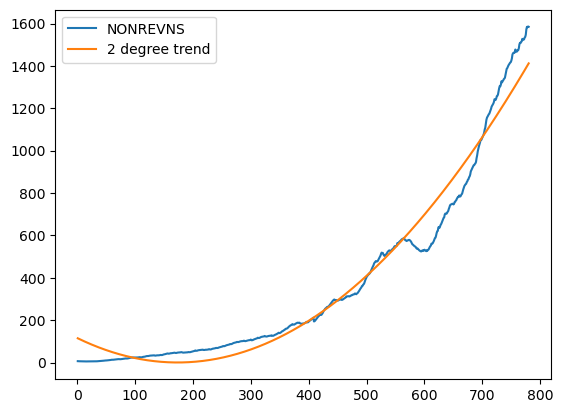

In [666]:
plt.plot(nonrev_x_axis_values,nonrev_train, label='NONREVNS')
plt.plot(nonrev_x_axis_values,predict_on_two_degree_nonrev, label='2 degree trend')
plt.legend()

Отримали модель:

In [667]:
coefficients2_2 = two_degree_model_nonrev.params
print('y(k)=',coefficients2_2[0],'+', coefficients2_2[1], '* k +',coefficients2_2[2], '* k^2')

y(k)= 115.87884861999565 + -1.3313644571789829 * k + 0.0038370951229567893 * k^2


### Спробуємо тренд 3-го порядку:

In [668]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(rev_x_axis_values[:, np.newaxis])

three_degree_model_rev = sm.OLS(rev_train, X_poly).fit()
predict_on_three_degree_rev = three_degree_model_rev.predict(X_poly)

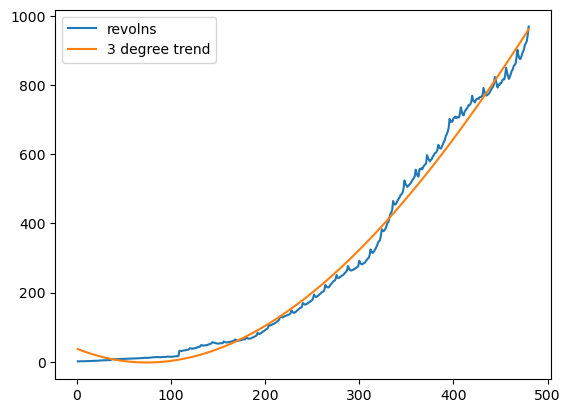

In [669]:
plt.plot(rev_x_axis_values,rev_train, label='revolns')
plt.plot(rev_x_axis_values,predict_on_three_degree_rev, label='3 degree trend')
plt.legend()

In [670]:
coefficients3_1 = three_degree_model_rev.params
print('y(k)=',coefficients3_1[0],'+',coefficients3_1[1], '* k +',coefficients3_1[2], '* k^2 +', coefficients3_1[3], '* k^3' )

y(k)= 38.043825570037185 + -1.093464544649384 * k + 0.00770179174098929 * k^2 + -2.9490651194988046e-06 * k^3


Спробуємо тренд 3-го порядку для nonrev

In [671]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(nonrev_x_axis_values[:, np.newaxis])

three_degree_model_nonrev = sm.OLS(nonrev_train, X_poly).fit()
predict_on_three_degree_nonrev = three_degree_model_nonrev.predict(X_poly)

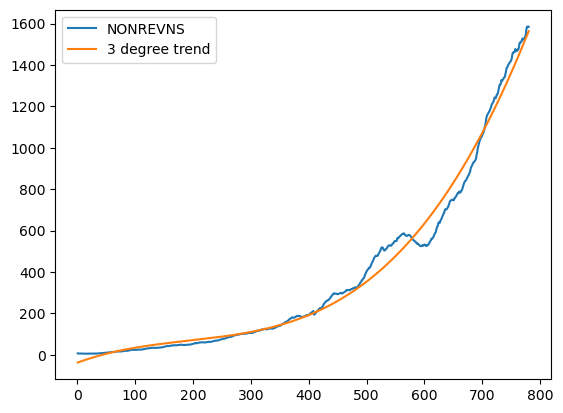

In [672]:
plt.plot(nonrev_x_axis_values,nonrev_train, label='NONREVNS')
plt.plot(nonrev_x_axis_values,predict_on_three_degree_nonrev, label='3 degree trend')
plt.legend()

In [673]:
coefficients3_2 = three_degree_model_nonrev.params
print('y(k)=',coefficients3_2[0],'+', coefficients3_2[1], '* k +',coefficients3_2[2], '* k^2 +',coefficients3_2[3], '* k^3')

y(k)= -38.25919386635472 + 1.029395280974937 * k + -0.003714915270087321 * k^2 + 6.44644506443374e-06 * k^3


### ARIMA

Для першого набору:

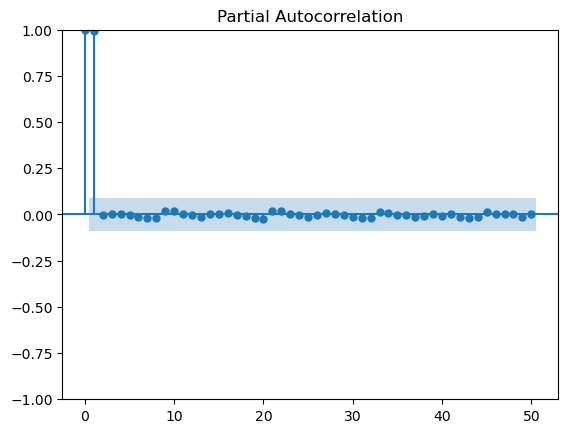

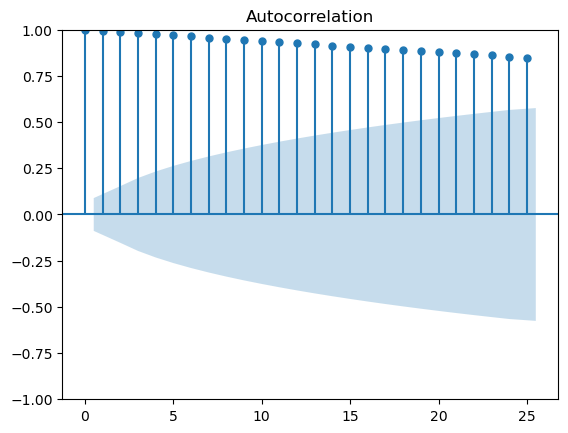

In [674]:
plot_pacf(rev, lags=50)
plot_acf(rev, lags=25)
plt.show()

In [675]:
stepwise_fit = auto_arima(y=rev_train, trace= True, stepwise=True, 
                          max_p=8, max_q=8,
                          start_p=2, start_q=2,
                          method='nm', 
                          suppress_stepwise=True, suppress_warnings=True,
                          seasonal=True, m=12) 
#  start_p=10, start_q=10, max_p=15, max_q=15    |   method='powell', 'bfgs', 'nm'
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=2466.447, Time=1.02 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=3271.804, Time=0.07 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2732.242, Time=0.59 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=2900.104, Time=0.92 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=2583.076, Time=0.39 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=2518.652, Time=1.12 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=2503.268, Time=2.00 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=3199.810, Time=0.22 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=2828.037, Time=1.11 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=2522.537, Time=0.76 sec
 ARIMA(2,2,2)(2,0,2)[12]             : AIC=3550.760, Time=1.85 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=2284.703, Time=1.75 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=2765.299, Time=0.81 sec
 ARIMA(1,2,2)(1,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  480
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 12)   Log Likelihood               -1136.351
Date:                              Fri, 17 May 2024   AIC                           2284.703
Time:                                      06:16:46   BIC                           2309.721
Sample:                                           0   HQIC                          2294.538
                                              - 480                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6941      0.258     -2.689      0.007      -1.200      -0.188
ma.L1         -0.2275      0.272     -0.836      0.403      -0.761       0.306
ma.L2         -0.5538      0.241     -2.299      0.021      -1.026      -0.082
ar.S.L12       0.9700      0.010     97.421      0.000       0.950       0.990
ma.S.L12      -0.5517      0.036    -15.484      0.000      -0.622      -0.482
sigma2         6.4618      0.186     34.821      0.000       6.098       6.826
===================================================================================
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):              2733.66
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               7.02   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Оскільки в часовому ряді revolns прослідковується сезонність - зробимо сезонну декомпозицію

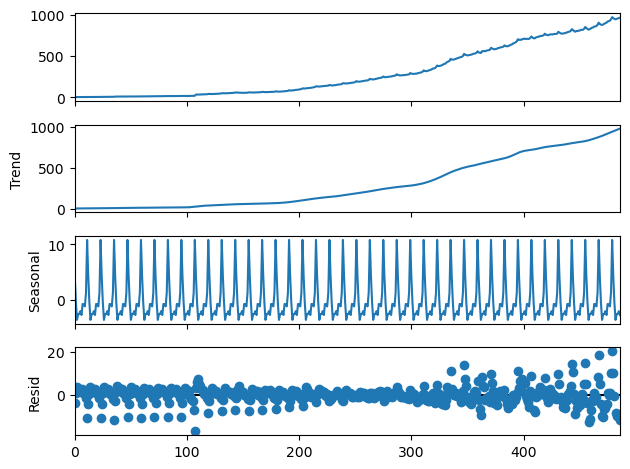

In [676]:
tsdf=pd.DataFrame(rev)
result = seasonal_decompose(tsdf, model='additive',extrapolate_trend='freq', period=12)
result.plot()
plt.show()

In [677]:
# warnings.filterwarnings('ignore')
p, d, q = 1, 2, 2
P, D, Q, s = 1, 0, 1, 12
arima_model_rev = ARIMA(rev_train, order=(p, d, q), seasonal_order=(P, D, Q, s), trend='n') # seasonal_order=(P, D, Q, s),
arima_model_rev = arima_model_rev.fit()
predict_on_arima_rev = arima_model_rev.predict(start=1, end=len(rev_train))

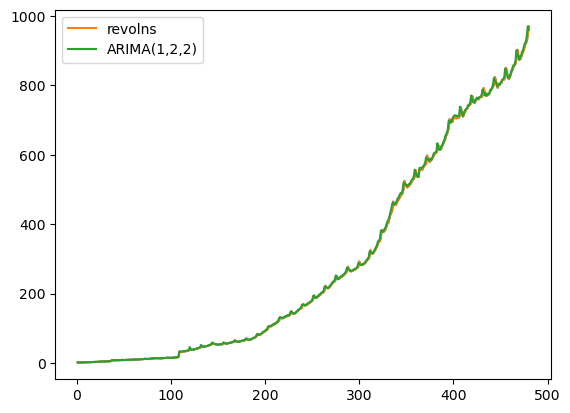

In [678]:
plt.plot(rev_x_axis_values, rev_train)
plt.plot(rev_x_axis_values,rev_train, label='revolns')
plt.plot(rev_x_axis_values, predict_on_arima_rev, label=f'ARIMA({p},{d},{q})')
plt.legend()

Для другого набору:

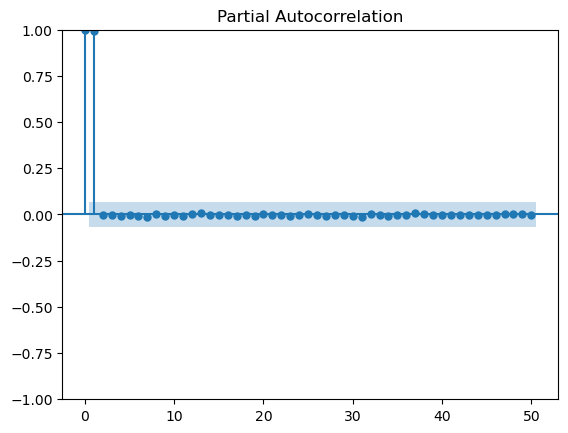

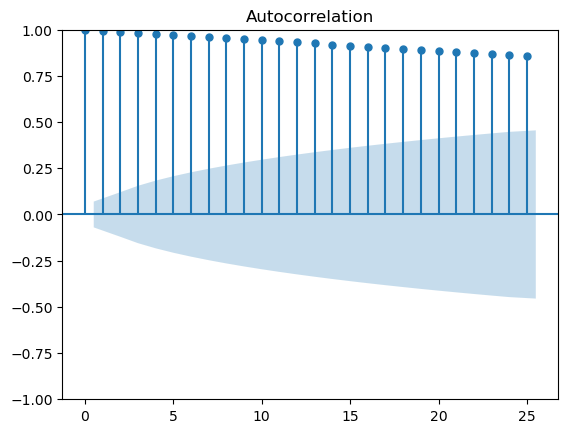

In [679]:
plot_pacf(nonrev, lags=50)
plot_acf(nonrev, lags=25)
plt.show()

In [680]:
stepwise_fit = auto_arima(y=nonrev_train, trace= True, stepwise=True,
                          max_p=8, max_q=8,
                          start_p=2, start_q=2,
                          method='nm',
                          suppress_stepwise=True, suppress_warnings=True,
                          seasonal=True, m=12)
#  start_p=10, start_q=10, max_p=15, max_q=15    |   method='powell', 'bfgs', 'nm'
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=3699.743, Time=1.12 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=4198.966, Time=0.11 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=3909.462, Time=0.60 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=3779.819, Time=0.70 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=3788.256, Time=1.05 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=3741.787, Time=0.53 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=3695.188, Time=1.43 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=3685.297, Time=1.26 sec
 ARIMA(1,2,2)(2,0,0)[12]             : AIC=3709.298, Time=1.18 sec
 ARIMA(2,2,1)(2,0,0)[12]             : AIC=3684.765, Time=1.71 sec
 ARIMA(2,2,1)(1,0,0)[12]             : AIC=3709.192, Time=0.56 sec
 ARIMA(2,2,1)(2,0,1)[12]             : AIC=3677.880, Time=1.62 sec
 ARIMA(2,2,1)(1,0,1)[12]             : AIC=3665.696, Time=0.59 sec
 ARIMA(2,2,1)(0,0,1)[12]             : AIC=3774.150, Time=0.60 sec
 ARIMA(2,2,1)(1,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  780
Model:             SARIMAX(1, 2, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -1812.764
Date:                                 Fri, 17 May 2024   AIC                           3639.529
Time:                                         06:17:28   BIC                           3672.126
Sample:                                              0   HQIC                          3652.068
                                                 - 780                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1539      0.023      6.812      0.000       0.110       0.198
ma.L1         -0.8652      0.014    -60.035      0.000      -0.893      -0.837
ar.S.L12       0.5621      0.287      1.960      0.050       0.000       1.124
ar.S.L24       0.2773      0.236      1.177      0.239      -0.184       0.739
ma.S.L12      -0.1240      0.287     -0.432      0.666      -0.687       0.439
ma.S.L24      -0.2272      0.111     -2.045      0.041      -0.445      -0.009
sigma2         5.6784      0.126     44.933      0.000       5.431       5.926
===================================================================================
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):              2136.26
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):             183.27   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [681]:
p, d, q = 1, 2, 1
P, D, Q, s = 2, 0, 2, 12
arima_model_nonrev = ARIMA(nonrev_train, order=(p, d, q), seasonal_order=(P, D, Q, s), trend='n') # seasonal_order=(P, D, Q, s),
arima_model_nonrev = arima_model_nonrev.fit()
predict_on_arima_nonrev = arima_model_nonrev.predict(start=1, end=len(nonrev_train))

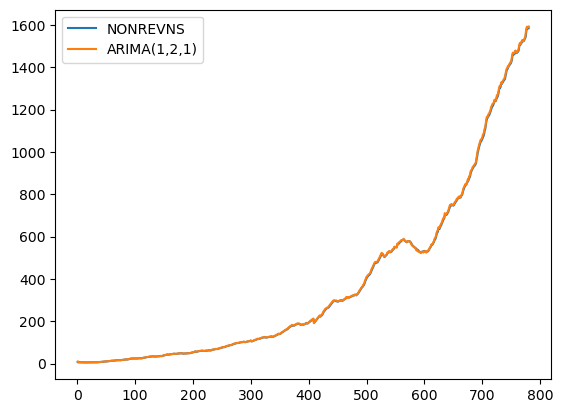

In [682]:
plt.plot(nonrev_x_axis_values, nonrev_train, label='NONREVNS')
plt.plot(nonrev_x_axis_values, predict_on_arima_nonrev, label=f'ARIMA({p},{d},{q})')
plt.legend()

### AR

Для першого набору

In [703]:
ar_model_rev = AutoReg(rev_train, lags=[1, 2], seasonal=True, period=12)
ar_model_rev = ar_model_rev.fit()
print(ar_model_rev.summary())
predict_on_ar_rev = ar_model_rev.predict(start=1, end=len(rev_train))
predict_on_ar_rev[0] = np.mean(predict_on_ar_rev[1:6])

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  480
Model:               Seas. AutoReg(2)   Log Likelihood               -1331.921
Method:               Conditional MLE   S.D. of innovations              3.926
Date:                Fri, 17 May 2024   AIC                           2693.843
Time:                        06:37:43   BIC                           2756.387
Sample:                             2   HQIC                          2718.432
                                  480                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4183      0.796     -8.063      0.000      -7.978      -4.858
s(2,12)        3.0028      1.136      2.644      0.008       0.777       5.228
s(3,12)        4.4797      1.085      4.129      0.0

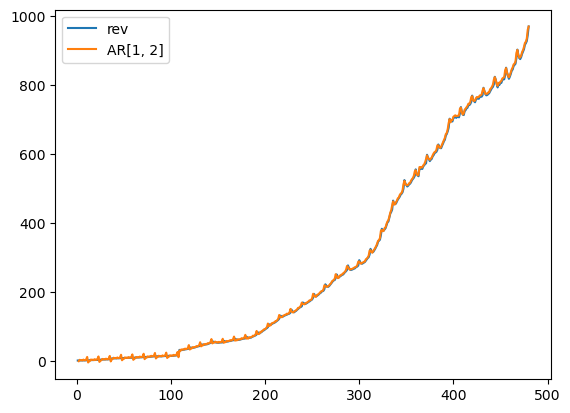

In [684]:
plt.plot(rev_x_axis_values, rev_train, label='rev')
plt.plot(rev_x_axis_values, predict_on_ar_rev, label=f'AR{ar_model_rev.ar_lags}')
plt.legend()

Для другого набору

In [715]:
ar_model_nonrev = AutoReg(nonrev_train, lags=[1, 2], seasonal=False, period=12, trend='ct')
ar_model_nonrev = ar_model_nonrev.fit()
print(ar_model_nonrev.summary())
predict_on_ar_nonrev = ar_model_nonrev.predict(start=1, end=len(nonrev_train))
predict_on_ar_nonrev[0] = np.mean(predict_on_ar_nonrev[1:6])

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  780
Model:                     AutoReg(2)   Log Likelihood               -1955.231
Method:               Conditional MLE   S.D. of innovations              2.987
Date:                Fri, 17 May 2024   AIC                           3920.462
Time:                        06:51:32   BIC                           3943.746
Sample:                             2   HQIC                          3929.419
                                  780                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0908      0.267     -0.341      0.733      -0.614       0.432
trend          0.0011      0.001      1.082      0.279      -0.001       0.003
y.L1           1.3775      0.033     41.173      0.0

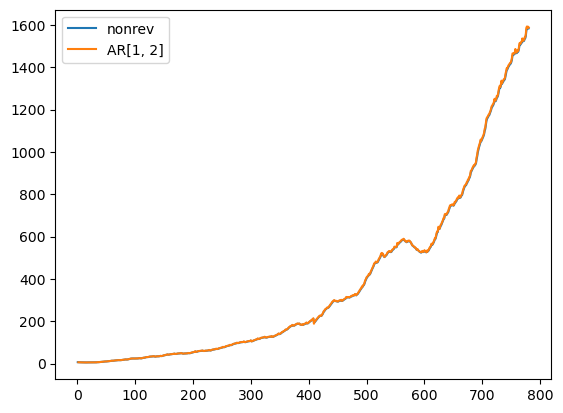

In [686]:
plt.plot(nonrev_x_axis_values, nonrev_train, label='nonrev')
plt.plot(nonrev_x_axis_values, predict_on_ar_nonrev, label=f'AR{ar_model_rev.ar_lags}')
plt.legend()

### ARMA

Для першого набору

In [687]:
# warnings.filterwarnings('ignore')
p, d, q = 2, 0, 4
P, D, Q, s = 1, 0, 1, 12
arma_model_rev = ARIMA(rev_train, order=(p, d, q), seasonal_order=(P, D, Q, s), trend='n') # seasonal_order=(P, D, Q, s),
arma_model_rev = arma_model_rev.fit()
predict_on_arma_rev = arma_model_rev.predict(start=1, end=len(rev_train))

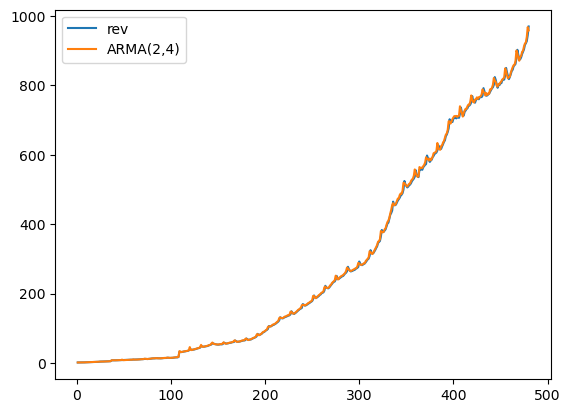

In [688]:
plt.plot(rev_x_axis_values, rev_train, label='rev')
plt.plot(rev_x_axis_values, predict_on_arma_rev, label=f'ARMA({p},{q})')
plt.legend()

Для другого набору

In [689]:
# warnings.filterwarnings('ignore')
p, d, q = 2, 0, 4
P, D, Q, s = 2, 0, 2, 12
arma_model_nonrev = ARIMA(nonrev_train, order=(p, d, q), seasonal_order=(P, D, Q, s), trend='n') # seasonal_order=(P, D, Q, s),
arma_model_nonrev = arma_model_nonrev.fit()
predict_on_arma_nonrev = arma_model_nonrev.predict(start=1, end=len(nonrev_train))

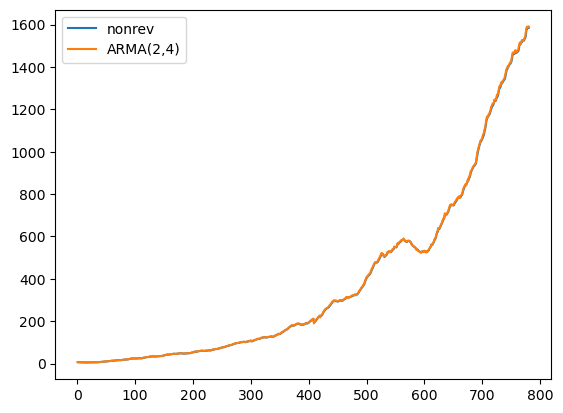

In [690]:
plt.plot(nonrev_x_axis_values, nonrev_train, label='nonrev')
plt.plot(nonrev_x_axis_values, predict_on_arma_nonrev, label=f'ARMA({p},{q})')
plt.legend()

### Статистичні характеристики:

In [691]:
def sqr (y, y_pred):
    return np.sum((y/1000-y_pred/1000)**2)

def mape(y, pred):
    return np.mean(np.abs((y - pred) / y)) * 100

def thail_a(y, pred):
    theil_a_numerator = np.sqrt(np.mean((y - pred) ** 2) / np.mean((y ** 2)))
    theil_a_denominator = np.mean(np.abs((y - pred) / y))
    return theil_a_numerator / theil_a_denominator

Для першого набору:

In [719]:
metrics_for_train_rev = pd.DataFrame({"Model":[],
                            "R^2":[],
                            "SSR":[],
                            "DW":[],
                            })
metrics_for_train_rev.loc[len(metrics_for_train_rev.index)] = ["1 degree trend", r2_score(rev_train, predict_on_one_degree_rev), 
                                                               sqr(rev_train, predict_on_one_degree_rev),durbin_watson(one_degree_model_rev.resid), ]
metrics_for_train_rev.loc[len(metrics_for_train_rev.index)] = ["2 degree trend", r2_score(rev_train, predict_on_two_degree_rev), 
                                                               sqr(rev_train, predict_on_two_degree_rev), durbin_watson(two_degree_model_rev.resid), ]
metrics_for_train_rev.loc[len(metrics_for_train_rev.index)] = ["3 degree trend", r2_score(rev_train, predict_on_three_degree_rev), 
                                                               sqr(rev_train, predict_on_three_degree_rev), durbin_watson(three_degree_model_rev.resid), ]
metrics_for_train_rev.loc[len(metrics_for_train_rev.index)] = ["ARIMA", r2_score(rev_train, predict_on_arima_rev), 
                                                               sqr(rev_train, predict_on_arima_rev), durbin_watson(arima_model_rev.resid), ]
metrics_for_train_rev.loc[len(metrics_for_train_rev.index)] = ["AR", r2_score(rev_train, predict_on_ar_rev), 
                                                               sqr(rev_train, predict_on_ar_rev), durbin_watson(ar_model_rev.resid), ]
metrics_for_train_rev.loc[len(metrics_for_train_rev.index)] = ["ARMA", r2_score(rev_train, predict_on_arma_rev), 
                                                               sqr(rev_train, predict_on_arma_rev), durbin_watson(arma_model_rev.resid), ]

In [720]:
metrics_for_train_rev

,Model,R^2,SSR,DW
0,1 degree trend,0.777639,9.228756,0.001645
1,2 degree trend,0.991920,0.335364,0.041764
2,3 degree trend,0.992359,0.317130,0.044236
3,ARIMA,0.999707,0.012155,1.914806
4,AR,0.999769,0.009587,1.976438
5,ARMA,0.999722,0.011522,1.984435


Для другого набору:

In [717]:
metrics_for_train_nonrev = pd.DataFrame({"Model":[],
                            "R^2":[],
                            "SSR":[],
                            "DW":[], })

metrics_for_train_nonrev.loc[len(metrics_for_train_nonrev.index)] = ["1 degree trend", r2_score(nonrev_train, predict_on_one_degree_nonrev), 
                                                                     sqr(nonrev_train, predict_on_one_degree_nonrev), durbin_watson(one_degree_model_nonrev.resid), ]
metrics_for_train_nonrev.loc[len(metrics_for_train_nonrev.index)] = ["2 degree trend", r2_score(nonrev_train, predict_on_two_degree_nonrev), 
                                                                     sqr(nonrev_train, predict_on_two_degree_nonrev), durbin_watson(two_degree_model_nonrev.resid), ]
metrics_for_train_nonrev.loc[len(metrics_for_train_nonrev.index)] = ["3 degree trend", r2_score(nonrev_train, predict_on_three_degree_nonrev), 
                                                                     sqr(nonrev_train, predict_on_three_degree_nonrev), durbin_watson(three_degree_model_nonrev.resid)]
metrics_for_train_nonrev.loc[len(metrics_for_train_nonrev.index)] = ["ARIMA", r2_score(nonrev_train, predict_on_arima_nonrev), 
                                                                     sqr(nonrev_train,predict_on_arima_nonrev),    durbin_watson(arima_model_nonrev.resid)]
metrics_for_train_nonrev.loc[len(metrics_for_train_nonrev.index)] = ["AR", r2_score(nonrev_train, predict_on_ar_nonrev), sqr(nonrev_train, predict_on_ar_nonrev),
                                                                     durbin_watson(ar_model_nonrev.resid), ]
metrics_for_train_nonrev.loc[len(metrics_for_train_nonrev.index)] = ["ARMA", r2_score(nonrev_train, predict_on_arma_nonrev), sqr(nonrev_train, predict_on_arma_nonrev),
                                                                     durbin_watson(arma_model_nonrev.resid), ]

In [718]:
metrics_for_train_nonrev

,Model,R^2,SSR,DW
0,1 degree trend,0.690821,42.516258,0.000279
1,2 degree trend,0.969356,4.214015,0.002051
2,3 degree trend,0.988313,1.607053,0.005001
3,ARIMA,0.999922,0.010659,1.986718
4,AR,0.999945,0.007525,2.052237
5,ARMA,0.999940,0.008231,1.914139


### Таблиця результатів статичного прогнозування на 7 кроків вперед для rev набору

In [732]:
# Для тренду 3-го порядку
X_poly = poly_features.fit_transform(rev_x_test[:, np.newaxis])
test_predict_on_three_degree_rev = three_degree_model_rev.predict(X_poly)

# Для ARIMA
test_predict_on_arima_rev = arima_model_rev.predict(start=len(rev_train)+1, end=len(rev_train)+len(rev_test))

# Для AR
test_predict_on_ar_rev = ar_model_rev.predict(start=len(rev_train)+1, end=len(rev_train)+len(rev_test))

# Для ARMA
test_predict_on_arma_rev = arma_model_rev.predict(start=len(rev_train)+1, end=len(rev_train)+len(rev_test))

Обчислимо статистики(MSE, MAE, MAPE, Theil-a):

In [733]:
metrics_for_static_predict_rev = pd.DataFrame({"Model":[],
                                               "MSE":[],
                                               "MAE":[],
                                               "MAPE":[],
                                               "Theil-a":[]})
metrics_for_static_predict_rev.loc[len(metrics_for_static_predict_rev.index)] = ["3 degree trend", mean_squared_error(rev_y_test, test_predict_on_three_degree_rev),
                                                                                 mean_absolute_error(rev_y_test, test_predict_on_three_degree_rev),
                                                                                 mape(rev_y_test, test_predict_on_three_degree_rev),
                                                                                 thail_a(rev_y_test, test_predict_on_three_degree_rev), ]
metrics_for_static_predict_rev.loc[len(metrics_for_static_predict_rev.index)] = ["ARIMA", mean_squared_error(rev_y_test, test_predict_on_arima_rev),
                                                                                 mean_absolute_error(rev_y_test, test_predict_on_arima_rev),
                                                                                 mape(rev_y_test, test_predict_on_arima_rev),
                                                                                 thail_a(rev_y_test, test_predict_on_arima_rev), ]
metrics_for_static_predict_rev.loc[len(metrics_for_static_predict_rev.index)] = ["AR", mean_squared_error(rev_y_test, test_predict_on_ar_rev),
                                                                                 mean_absolute_error(rev_y_test, test_predict_on_ar_rev),
                                                                                 mape(rev_y_test, test_predict_on_ar_rev),
                                                                                 thail_a(rev_y_test, test_predict_on_ar_rev), ]
metrics_for_static_predict_rev.loc[len(metrics_for_static_predict_rev.index)] = ["ARMA", mean_squared_error(rev_y_test, test_predict_on_arma_rev),
                                                                                 mean_absolute_error(rev_y_test, test_predict_on_arma_rev),
                                                                                 mape(rev_y_test, test_predict_on_arma_rev),
                                                                                 thail_a(rev_y_test, test_predict_on_arma_rev), ]

In [734]:
metrics_for_static_predict_rev

,Model,MSE,MAE,MAPE,Theil-a
0,3 degree trend,681.659255,24.989728,2.625280,1.087411
1,ARIMA,499.125104,19.341108,2.119370,1.249228
2,AR,952.571205,29.705561,3.119803,1.079359
3,ARMA,62.052398,7.575247,1.059094,1.244470


#### Графік прогнозованих значень:

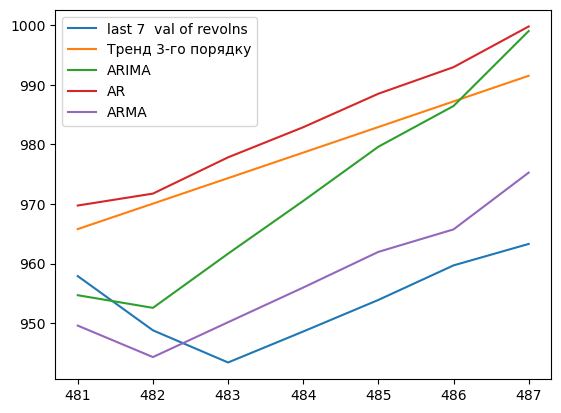

In [735]:
plt.plot(rev_x_test, rev_y_test, label='last 7  val of revolns')
plt.plot(rev_x_test, test_predict_on_three_degree_rev, label='Тренд 3-го порядку')
plt.plot(rev_x_test, test_predict_on_arima_rev, label='ARIMA')
plt.plot(rev_x_test, test_predict_on_ar_rev, label='AR')
plt.plot(rev_x_test, test_predict_on_arma_rev, label='ARMA')
plt.legend()

### Таблиця результатів статичного прогнозування на 7 кроків вперед для nonrev набору

In [737]:
# Для тренду 3-го порядку
X_poly = poly_features.fit_transform(nonrev_x_test)
test_predict_on_three_degree_nonrev = three_degree_model_nonrev.predict(X_poly)

# Для ARIMA
test_predict_on_arima_nonrev = arima_model_nonrev.predict(start=len(nonrev_train)+1, end=len(nonrev_train)+len(nonrev_test))

# Для AR
test_predict_on_ar_nonrev = ar_model_nonrev.predict(start=len(nonrev_train)+1, end=len(nonrev_train)+len(nonrev_test))

# Для ARMA
test_predict_on_arma_nonrev = arma_model_nonrev.predict(start=len(nonrev_train)+1, end=len(nonrev_train)+len(nonrev_test))

Обчислимо статистики(MSE, MAE, MAPE, Theil-a):

In [738]:
metrics_for_static_predict_nonrev = pd.DataFrame({"Model":[],
                                               "MSE":[],
                                               "MAE":[],
                                               "MAPE":[],
                                               "Theil-a":[]})
metrics_for_static_predict_nonrev.loc[len(metrics_for_static_predict_nonrev.index)] = ["3 degree trend", 
                                                                                       mean_squared_error(nonrev_y_test, test_predict_on_three_degree_nonrev),
                                                                                 mean_absolute_error(nonrev_y_test, test_predict_on_three_degree_nonrev),
                                                                                 mape(nonrev_y_test, test_predict_on_three_degree_nonrev),
                                                                                 thail_a(nonrev_y_test, test_predict_on_three_degree_nonrev), ]
metrics_for_static_predict_nonrev.loc[len(metrics_for_static_predict_nonrev.index)] = ["ARIMA", 
                                                                                       mean_squared_error(nonrev_y_test, test_predict_on_arima_nonrev),
                                                                                 mean_absolute_error(nonrev_y_test, test_predict_on_arima_nonrev),
                                                                                 mape(nonrev_y_test, test_predict_on_arima_nonrev),
                                                                                 thail_a(nonrev_y_test, test_predict_on_arima_nonrev), ]
metrics_for_static_predict_nonrev.loc[len(metrics_for_static_predict_nonrev.index)] = ["AR", 
                                                                                       mean_squared_error(nonrev_y_test, test_predict_on_ar_nonrev),
                                                                                 mean_absolute_error(nonrev_y_test, test_predict_on_ar_nonrev),
                                                                                 mape(nonrev_y_test, test_predict_on_ar_nonrev),
                                                                                 thail_a(nonrev_y_test, test_predict_on_ar_nonrev), ]
metrics_for_static_predict_nonrev.loc[len(metrics_for_static_predict_nonrev.index)] = ["ARMA", 
                                                                                       mean_squared_error(nonrev_y_test, test_predict_on_arma_nonrev),
                                                                                 mean_absolute_error(nonrev_y_test, test_predict_on_arma_nonrev),
                                                                                 mape(nonrev_y_test, test_predict_on_arma_nonrev),
                                                                                 thail_a(nonrev_y_test, test_predict_on_arma_nonrev), ]

In [739]:
metrics_for_static_predict_nonrev

,Model,MSE,MAE,MAPE,Theil-a
0,3 degree trend,277.479420,13.848891,1.059000,1.226175
1,ARIMA,67.162773,5.970457,0.680041,1.325052
2,AR,434.161074,18.716836,1.258877,1.213641
3,ARMA,67.492576,5.055404,0.701944,1.317951


#### Графік прогнозованих значень:

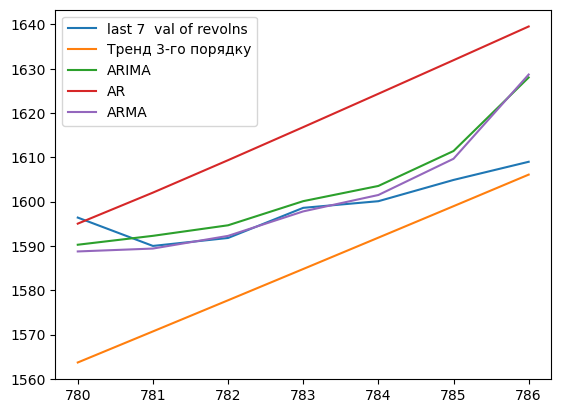

In [740]:
plt.plot(nonrev_x_test, nonrev_y_test, label='last 7  val of revolns')
plt.plot(nonrev_x_test, test_predict_on_three_degree_nonrev, label='Тренд 3-го порядку')
plt.plot(nonrev_x_test, test_predict_on_arima_nonrev, label='ARIMA')
plt.plot(nonrev_x_test, test_predict_on_ar_nonrev, label='AR')
plt.plot(nonrev_x_test, test_predict_on_arma_nonrev, label='ARMA')
plt.legend()